# Test del 27-10-2017
Dissalazione di una soluzione di acqua e NaCl, eseguita per 4 ore.

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
require(prospectr)
options(warn=-1)
NIR <- read.csv("27-10-2017.csv", header = T)
NIRA <- log(1/NIR)
NIR[,-1] <- standardNormalVariate(X = NIR[,-1])

### 1) Plot degli spettri in trasmittanza

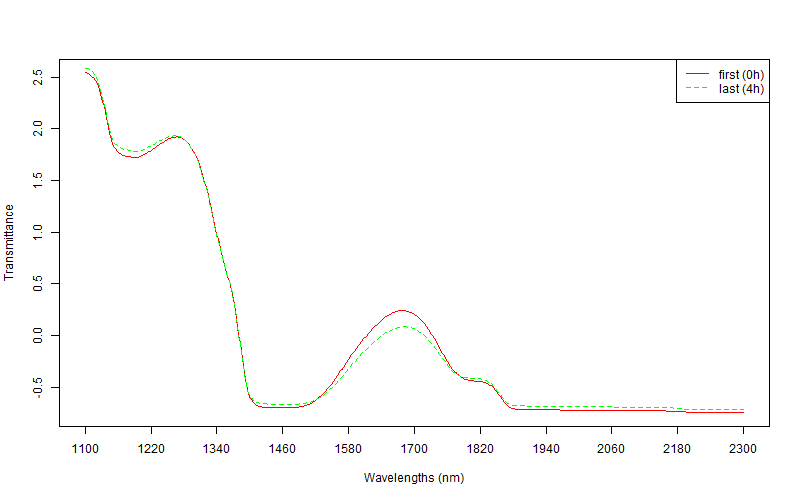

In [3]:
%%R -w 800 -h 500
x <- seq(1100, 2300, by = 2)
plot(x, NIR[1,-1], type = 'l', col = 'red', axes = F,
     xlab = 'Wavelengths (nm)', ylab = 'Transmittance')
lines(x, NIR[nrow(NIR),-1], col = 'green', lty = 2)
axis(1, seq(1100, 2300, length.out =  11))
axis(2,)
box()
legend('topright', c('first (0h)', 'last (4h)'), lty = c(1,2), col = c('red', 'green'))

### 2) Plot degli spettri in assorbanza

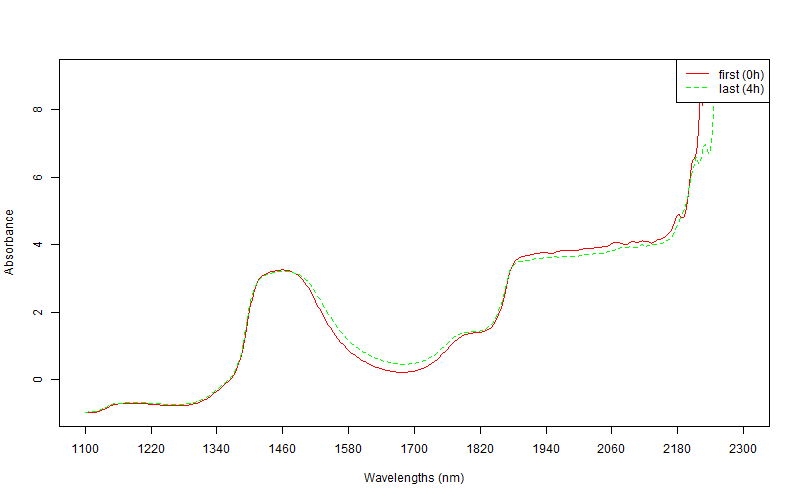

In [4]:
%%R -w 800 -h 500
plot(x, NIRA[1,-1], type = 'l', col = 'red', axes = F,
     xlab = 'Wavelengths (nm)', ylab = 'Absorbance')
lines(x, NIRA[nrow(NIRA),-1], col = 'green', lty = 2)
axis(1, seq(1100, 2300, length.out =  11))
axis(2,)
box()
legend('topright', c('first (0h)', 'last (4h)'), lty = c(1,2), col = c('red', 'green'))

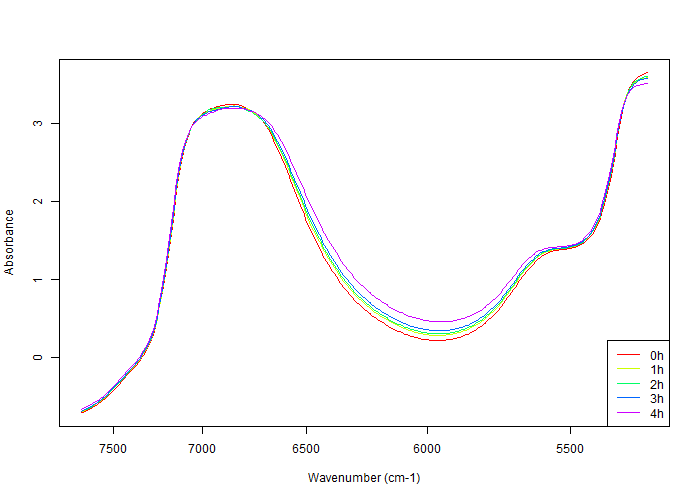

In [5]:
%%R -w 700 -h 500
xcm <- round((1/x)*10^7,1)
sel <- c(which(x<1300), which(x>1900))
cols = rainbow(5)
plot(x[-sel], NIRA[1,-c(1, sel+1)], type = 'l', col = cols[1], axes = F,
     xlab = 'Wavenumber (cm-1)', ylab = 'Absorbance')
lines(x[-sel], NIRA[round(nrow(NIRA)/4, 0),-c(1, sel+1)], col = cols[2])
lines(x[-sel], NIRA[round(nrow(NIRA)/3, 0),-c(1, sel+1)], col = cols[3])
lines(x[-sel], NIRA[round(nrow(NIRA)/2, 0),-c(1, sel+1)], col = cols[4])
lines(x[-sel], NIRA[nrow(NIRA),-c(1, sel+1)], col = cols[5])
xat <- c(1333.3, 1428.5, 1538.5, 1666.6, 1818.2)
xlabels <- round((1/xat)*10^7,0)
axis(1, xat, xlabels)
axis(2,)
box()
legend('bottomright', c('0h', '1h', '2h', '3h', '4h'), lty = 1, col = cols)

<figure>
    <img src=".\Img\Cattura.png" width="50%" align="left">
</figure>

### 3) Principal Component Analysis

#### - Scatter plot

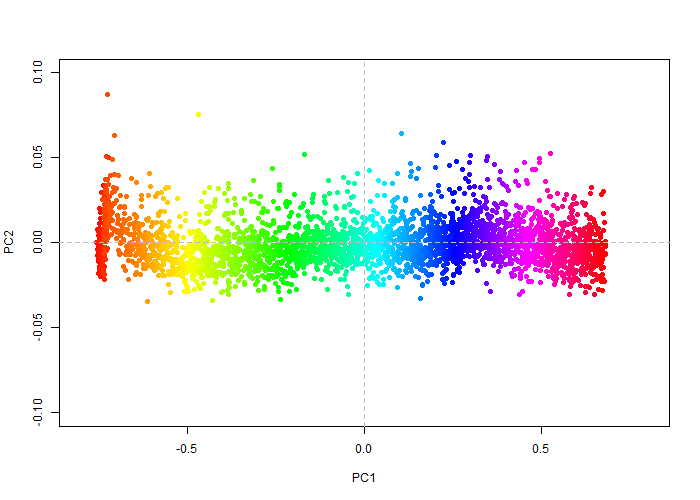

In [6]:
%%R -w 700 -h 500
pca <- prcomp(NIR[,-1], center = T)

cols <- rainbow(nrow(NIR))

labels <- as.numeric(as.factor(NIR$Sample))

scores <- pca$x
loadings <- pca$rotation

plot(scores[,1], scores[,2], col = cols[labels], pch = 16, ylim = c(-0.1, 0.1), xlim = c(-.8, .8),
     xlab = 'PC1', ylab = 'PC2')
abline(v = 0, lty = 2, col = 'grey')
abline(h = 0, lty = 2, col = 'grey')

#### - Loading plot

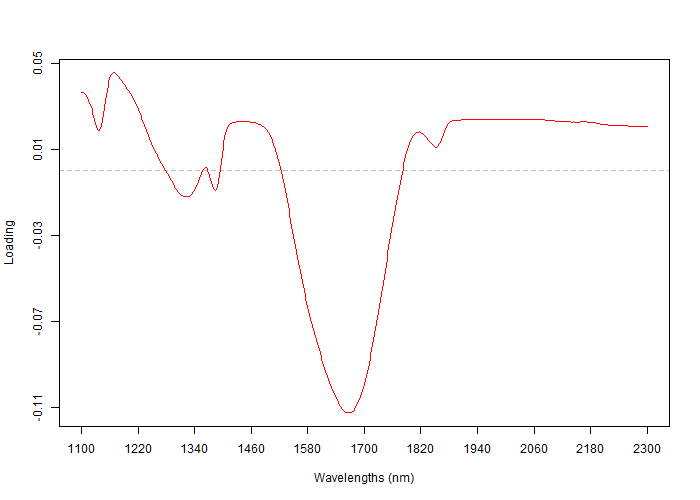

In [7]:
%%R -w 700 -h 500
yrange <- c(min(loadings[,1]), max(loadings[,1]))
plot(x, loadings[,1], ylim = yrange, type = 'n',
     xlab = 'Wavelengths (nm)', ylab = 'Loading',  axes = F)
abline(h = 0, lty = 2, col = 'grey')
lines(x, loadings[,1], col = 'red')
axis(1, seq(1100, 2300, length.out =  11))
axis(2, round(seq(yrange[1], yrange[2], length.out = 5),2))
box()

Lunghezze d'onda di maggior interesse:
- 1168 nm (v1 + v2 + v3 dell'acqua)
- 1438 nm (v1 + v3 dell'aqua)
- 1666 nm (minimo locale del picco di acqua a 1438 nm)

<br>dove,
- v1, symmetric stretch
- v2, bending
- v3, asymmetric stretch

#### - Plot della PC1 per ogni campione acquisito
I campioni sono disposti in ordine cronologico di acquisizione

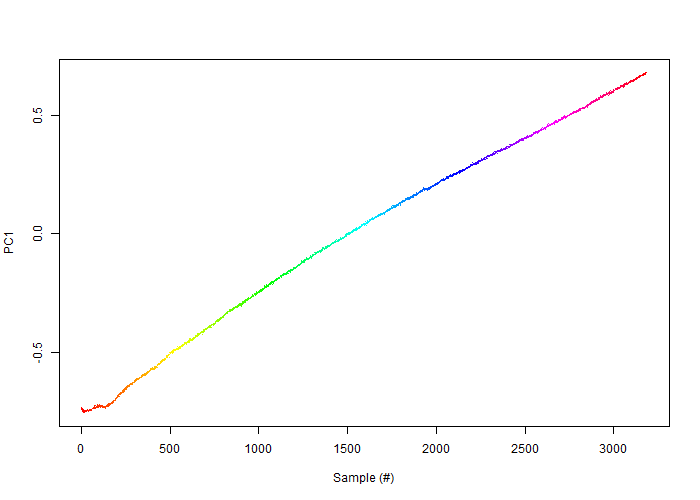

In [8]:
%%R -w 700 -h 500
cols = rainbow(nrow(NIR))
plot(scores[,1], pch = '.', col = cols, xlab = 'Sample (#)', ylab = 'PC1')

### 4) Analisi del picco di acqua a 1438 nm 

#### - Rapporto tra i valori in trasmittanza del massimo e del minimo locale

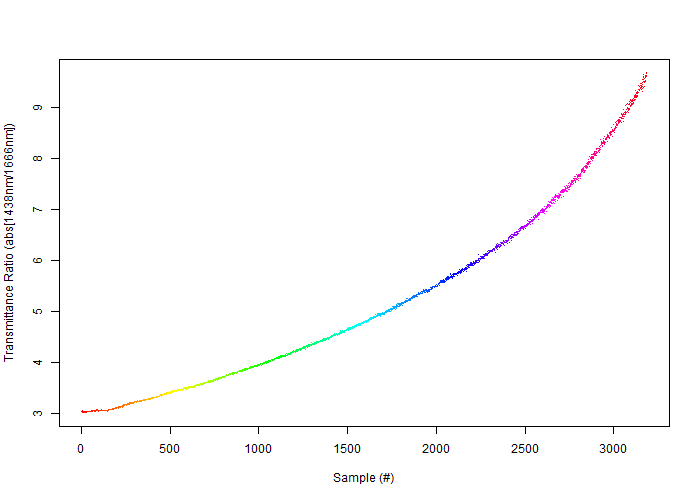

In [9]:
%%R -w 700 -h 500
ratio <- abs(NIR$X1438/NIR$X1666)
plot(ratio, pch = '.', col = cols, xlab = 'Sample (#)', ylab = 'Transmittance Ratio (abs[1438nm/1666nm])')

#### - Differenza assoluta tra i valori in trasmittanza del massimo e del minimo locale

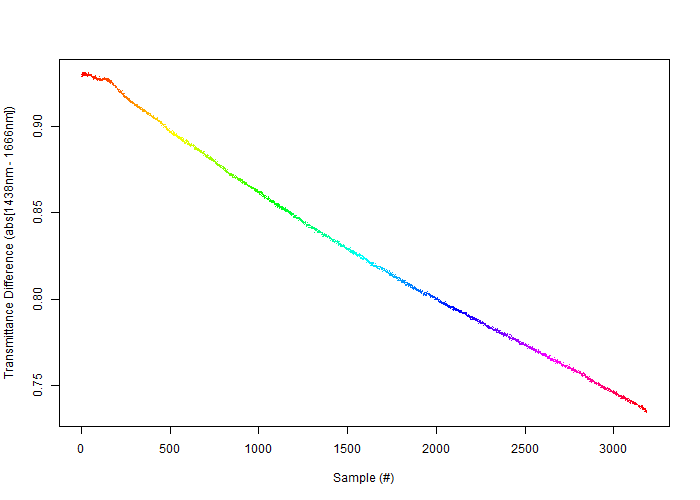

In [10]:
%%R -w 700 -h 500
diff <- abs(NIR$X1438-NIR$X1666)
plot(diff, pch = '.', col = cols, xlab = 'Sample (#)', ylab = 'Transmittance Difference (abs[1438nm - 1666nm])')